In [1]:
import sys
sys.path.append("/home/marin/projects/mhac/build/release")
import mhac

In [2]:
%matplotlib inline
import random, copy, math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_TSP_data(filepath="../../data/tsp/eil51.tsp"):
    cities = mhac.problems.tsp.Cities()

    with open(filepath, 'r') as infile:
        Name = infile.readline().strip().split()[1]
        FileType = infile.readline().strip().split()[1]
        Comment = infile.readline().strip().split()[1]
        Dimension = infile.readline().strip().split(":")[1]
        EdgeWeightType = infile.readline().strip().split()[1]
        infile.readline()

        for i in range(int(Dimension)):
            coords = infile.readline().strip().split()[1:]
            city = mhac.problems.tsp.City(int(coords[0]), int(coords[1]))
            cities.append(city)

    return cities

In [4]:
def displayTour(cities, solution):
    plt.figure(figsize = (16,8))
    N = len(cities)

    plt.axes()
    plt.plot([cities[solution[i % N]].x for i in range(N+1)], [cities[solution[i % N]].y for i in range(N+1)], 'bo-')
    plt.show()

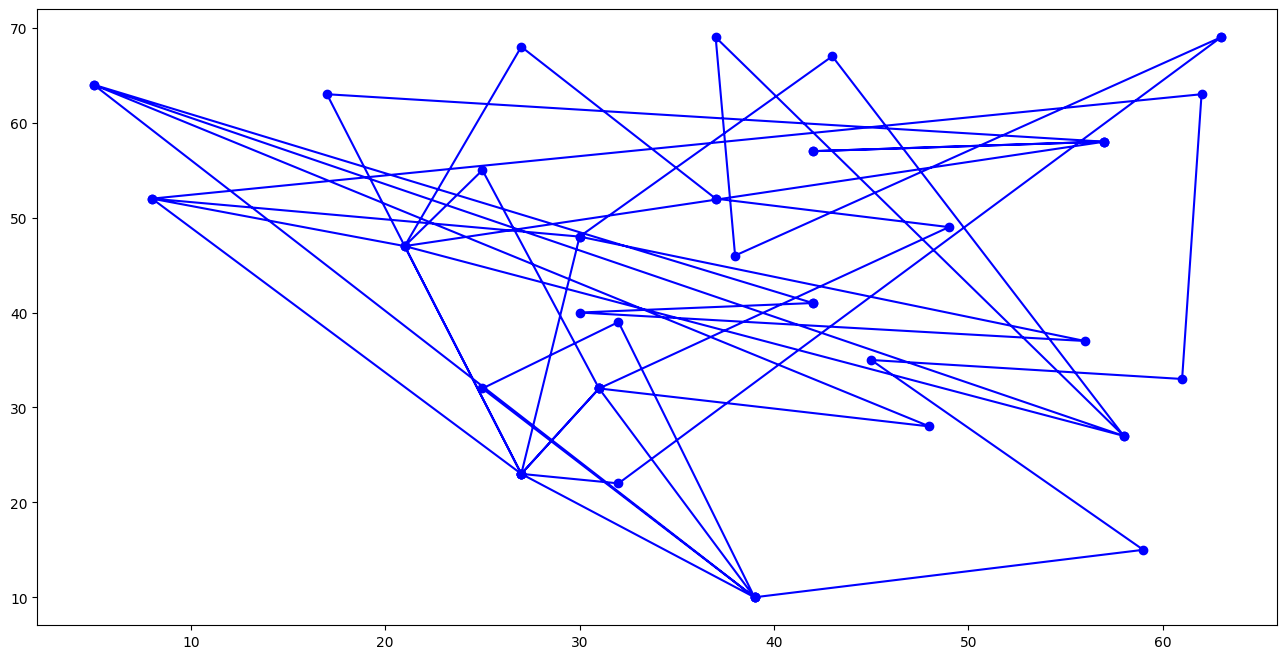

1238.724365234375

In [5]:
problem = mhac.problems.tsp.ACO_TSP(read_TSP_data())
ACO = mhac.swarm.AntColonyOptimization(problem)
sol = ACO.solve(50, 10, 0.5, 0.5, 0.25)
displayTour(problem.mCities, sol.tour)
sol.cost

In [6]:
sol.tour

VectorInt[0, 25, 5, 29, 42, 10, 10, 50, 49, 26, 16, 16, 11, 48, 42, 44, 44, 11, 47, 5, 16, 44, 46, 45, 44, 38, 37, 33, 34, 23, 16, 36, 35, 35, 31, 30, 29, 27, 26, 23, 5, 19, 19, 21, 21, 19, 6, 16, 11, 11, 1]

In [7]:
assert len(sol.tour) == len(set(sol.tour)), "Solution tour has duplicates"

AssertionError: Solution tour has duplicates